<a href="https://colab.research.google.com/github/cheruv/cheruv/blob/main/easyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 34.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.1+cu118
    Uninstalling torchaudio-2.0.1+cu118:
      Successfully uninstalled torchaudio-2.0.1+cu118
ERROR: pip's dependency resolver does not curr

In [ ]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files

# Upload the image file
uploaded = files.upload()

# Get the path of the uploaded file
im_path = next(iter(uploaded))

Saving mini2.jpg to mini2.jpg


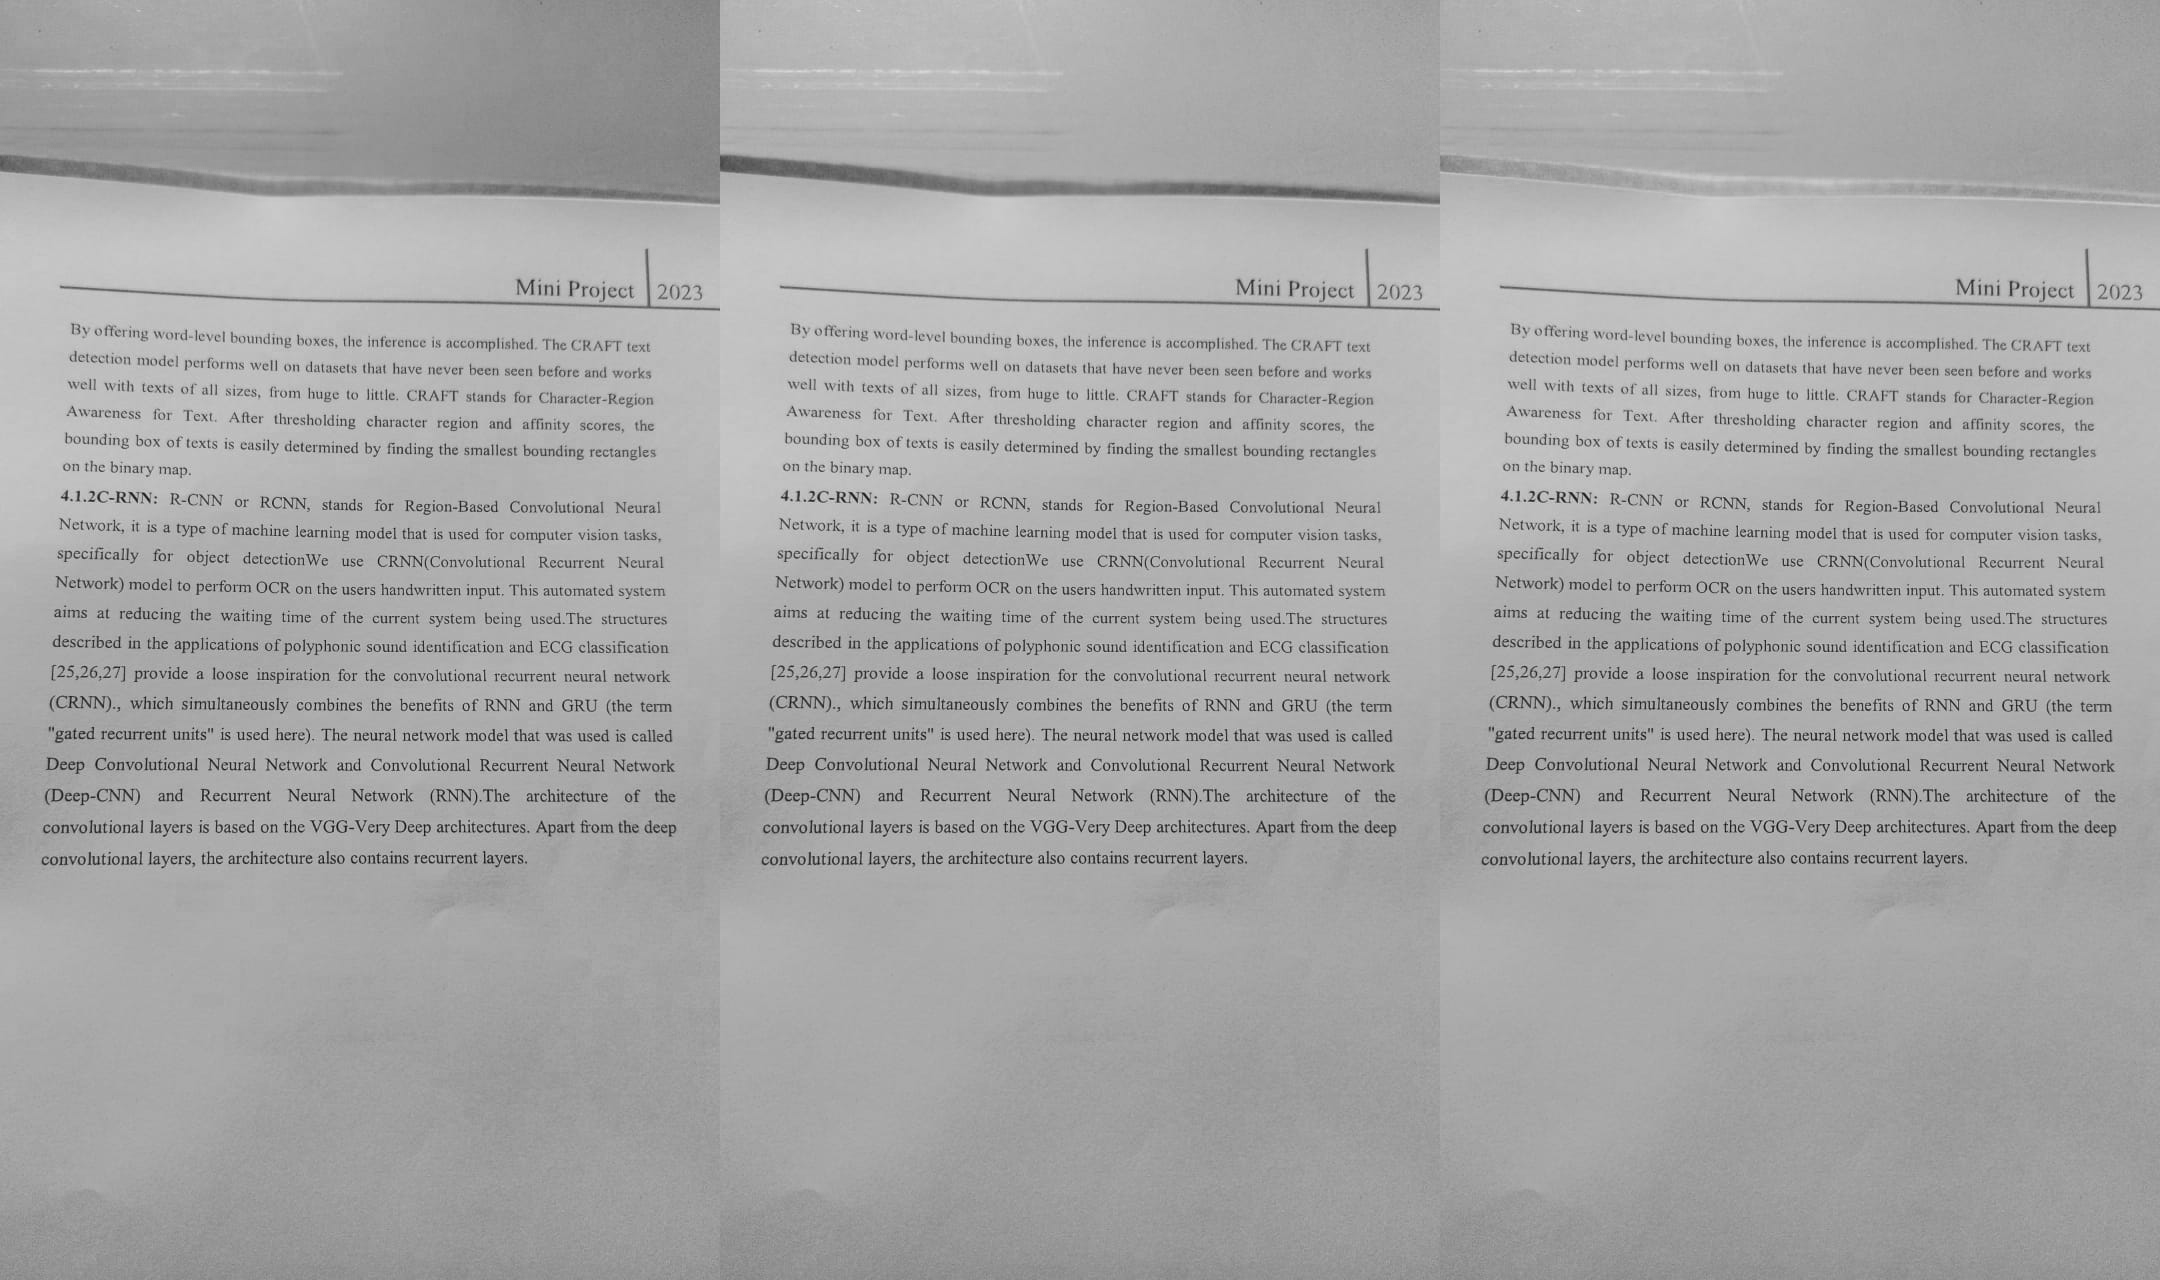

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread(im_path)
#img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#print(img_gray.shape)
#new_img = np.hstack((img1,img2,img3))
imgBlue = img[:,:,0]
imgGreen = img[:,:,1]
imgRed = img[:,:,2]
new_img = np.hstack((imgBlue,imgGreen,imgRed))
cv2_imshow(new_img)

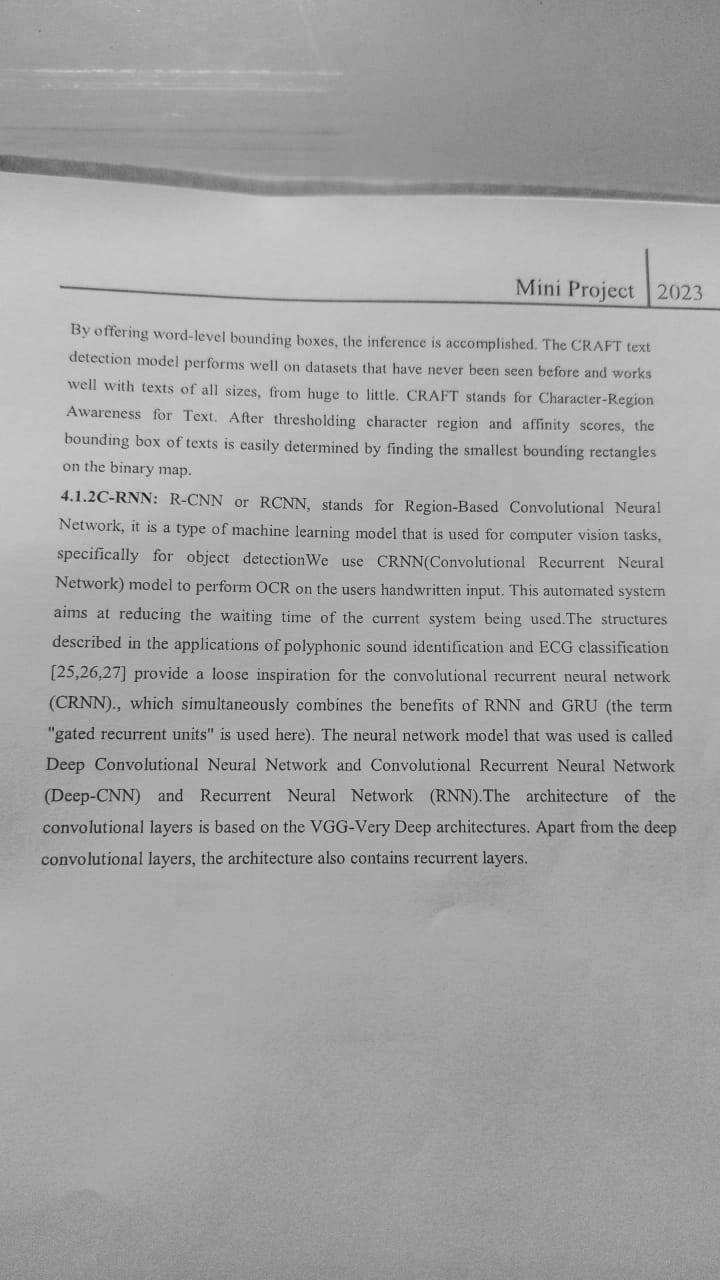

In [ ]:
cv2_imshow(imgBlue)

In [ ]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''

    reader = easyocr.Reader(['en'],gpu='False')
    return reader.readtext(img_path)

In [ ]:
results = recognize_text(imgBlue)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
results

[([[512, 274], [640, 274], [640, 306], [512, 306]],
  'Mini Project',
  0.9972840119542007),
 ([[654, 278], [706, 278], [706, 304], [654, 304]],
  '2023',
  0.9999877214431763),
 ([[69, 321], [93, 321], [93, 339], [69, 339]], 'By', 0.7956461452012296),
 ([[153, 329], [229, 329], [229, 345], [153, 345]],
  'word-level',
  0.7589837335148075),
 ([[226, 328], [338, 328], [338, 352], [226, 352]],
  'bounding hoxcs,',
  0.7787862840285186),
 ([[341, 335], [653, 335], [653, 355], [341, 355]],
  'the infcrenee Is accomplished. The CRAFT text',
  0.2572884780334176),
 ([[64, 346], [657, 346], [657, 383], [64, 383]],
  'detection model performs well on datasets (hat have never been seen before and works',
  0.6947054795987131),
 ([[64, 376], [606, 376], [606, 408], [64, 408]],
  'well with texts of all sizes, from huge (o little: CRAFT stands for Character-',
  0.4243204779581351),
 ([[605, 393], [657, 393], [657, 411], [605, 411]],
  'Region',
  0.9995787672718913),
 ([[64, 404], [145, 404], [

In [ ]:
import os

def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''

    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.2:
            # display
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=7)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=3)

            # save text to file
            text_file_path = f'./output/{save_name}.txt'
            os.makedirs(os.path.dirname(text_file_path), exist_ok=True)
            if not os.path.exists(text_file_path):
                open(text_file_path, 'w').close()
            with open(text_file_path, 'a') as f:
                f.write(f'Detected text: {text} (Probability: {prob:.2f})\n')

    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

Detected text: Mini Project (Probability: 1.00)
Detected text: 2023 (Probability: 1.00)
Detected text: By (Probability: 0.80)
Detected text: word-level (Probability: 0.76)
Detected text: bounding hoxcs, (Probability: 0.78)
Detected text: the inferenee IS accomplished. The CRAFT text (Probability: 0.31)
Detected text: detection model performs well on datasets (hat have never been seen before and works (Probability: 0.68)
Detected text: well with texts of all sizes, from huge (o little: CRAFT stands for Character- (Probability: 0.43)
Detected text: Region (Probability: 1.00)
Detected text: Awareness (Probability: 1.00)
Detected text: Tor (Probability: 0.79)
Detected text: Text, (Probability: 0.89)
Detected text: After (Probability: 0.99)
Detected text: thresholding (Probability: 1.00)
Detected text: character   region (Probability: 0.60)
Detected text: and   aflinity (Probability: 0.70)
Detected text: scores; (Probability: 0.75)
Detected text: the (Probability: 0.97)
Detected text: box o

<Figure size 640x480 with 0 Axes>

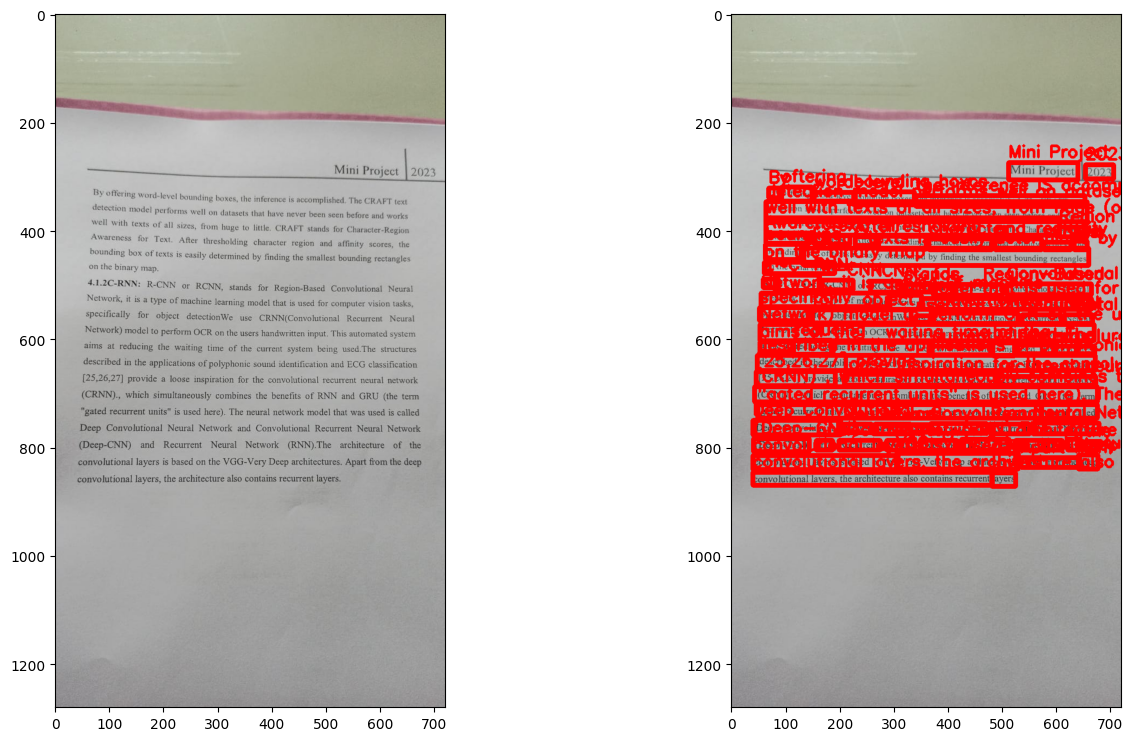

In [ ]:
overlay_ocr_text(im_path, '1_image')

Is EasyOCR faster than Tesseract?
Conclusions. As per my testing, Tesseract is preferable for CPU wheras EasyOCR for GPU machine. Tesseract works better on character level, while EasyOCR does a better job on words.

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import easyocr

def recognize_text(img_path):
    """Recognizes text in an image using easyocr."""
    # Load image using opencv
    img = cv2.imread(img_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    dilated = cv2.dilate(gray, kernel, iterations=3)
    eroded = cv2.erode(dilated, kernel, iterations=3)

    # Apply OCR using easyocr
    reader = easyocr.Reader(['en'])
    result = reader.readtext(eroded)

    return result


def overlay_ocr_text(img_path, save_name):
    """Loads an image, recognizes text, and overlays the text on the image."""

    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0] / dpi), int(img.shape[1] / dpi)
    plt.figure()
    f, axarr = plt.subplots(1, 2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    # Recognize text
    result = recognize_text(img_path)

    # Restructure recognized text into a structured format
    structured_result = {}
    for detection in result:
        bbox = detection[0]
        text = detection[1]
        prob = detection[2]
        left, top, right, bottom = bbox
        bbox = ((left, top), (right, top), (right, bottom), (left, bottom))

        # Add the detected text to the structured result dictionary
        if prob >= 0.2:
            level = 5
            if level not in structured_result:
                structured_result[level] = []
            structured_result[level].append({'bbox


In [ ]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files

# Upload the image file
uploaded = files.upload()

# Get the path of the uploaded file
im_path = next(iter(uploaded))

import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread(im_path)

# Preprocess the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Use EasyOCR to recognize the text
reader = easyocr.Reader(['en'], gpu=False)
results = reader.readtext(thresh, detail=0, paragraph=True)

# Print the recognized text
print(results)


Saving m1.jpg to m1.jpg
[]


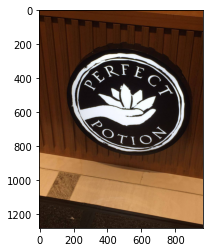

In [ ]:
import matplotlib.pyplot as plt
img_1 = cv2.imread(im_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [ ]:
import easyocr
import cv2

def recognize_text(img_path):
    '''loads an image and recognizes text.'''

    # Font adaptation
    font_list = ['arial', 'times new roman', 'comic sans', 'courier new']
    reader = easyocr.Reader(['en'])

    # Language model
    result = reader.readtext(img_path)
    return result


In [ ]:
!pip install google-cloud-vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.2/444.2 KB 23.3 MB/s eta 0:00:00


In [ ]:
from PIL import Image, ImageEnhance

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import easyocr
from PIL import Image

def recognize_text(img_path):
    '''loads an image and recognizes text.'''

    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

def overlay_ocr_text(img_path, save_name, uploaded_img=None):
    '''loads an image, preprocesses it to enhance the quality, recognizes text, and overlays the text on the image.'''

    # if an image was uploaded, save it to a file
    if uploaded_img is not None:
        uploaded_img.save(img_path)

    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # preprocess the image
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.medianBlur(img, 3)
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # augment the image
    aug_imgs = []
    aug_imgs.append(cv2.flip(img, 1))  # horizontal flip
    aug_imgs.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))  # rotation by 90 degrees
    aug_imgs.append(cv2.GaussianBlur(img, (5, 5), 0))  # Gaussian blur

    # fine-tune the OCR engine
    dataset_path = './dataset'
    train_data = easyocr.datasets.get_train_data(dataset_path)
    reader = easyocr.Reader(['en'], gpu=False)
    reader.train(train_data, batch_size=32, workers=4, epochs=10)

    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1, len(aug_imgs) + 1, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    for i, aug_img in enumerate(aug_imgs):
        # recognize text
        result = recognize_text(img_path)

        # if OCR prob is over 0.5, overlay bounding box and text
        for (bbox, text, prob) in result:
            if prob >= 0.2:
                # display
                print(f'Detected text: {text} (Probability: {prob:.2f})')

                # get top-left and bottom-right bbox vertices
                (x, y, w, h) = bbox
                top_left = (int(x), int(y))
                bottom_right = (int(x + w), int(y + h))

                # create a rectangle for bbox display
                cv2.rectangle(img=aug_img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=7)

                # put recognized text
                cv2.putText(img=aug_img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=3)

                # save text to file


In [ ]:
"""import os
import cv2
import numpy as np
from PIL import Image
import pytesseract
import random

def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''

    # load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # image preprocessing
    img = cv2.medianBlur(img, 3)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

    # image augmentation
    img = Image.fromarray(img)
    angle = random.randint(-10, 10)
    scale = random.uniform(0.8, 1.2)
    translation = (random.randint(-20, 20), random.randint(-20, 20))
    img = img.rotate(angle, resample=Image.BICUBIC)
    img = img.resize((int(img.width * scale), int(img.height * scale)), resample=Image.BICUBIC)
    img = Image.new("RGBA", img.size, (255, 255, 255, 255))
    img.paste(Image.fromarray(np.asarray(img)), translation)

    # OCR recognition
    text = pytesseract.image_to_string(img)

    # overlay bounding box and text for the words with the best accuracy
    for line in text.split('\n'):
        line = line.strip()
        if line:
            # display
            print(f'Detected text: {line}')

            # save text to file
            text_file_path = f'./output/{save_name}.txt'
            os.makedirs(os.path.dirname(text_file_path), exist_ok=True)
            with open(text_file_path, 'a') as f:
                f.write(f'Detected text: {line}\n')

    # show and save image
    dpi = 80
    fig_width, fig_height = int(img.width/dpi), int(img.height/dpi)
    plt.figure()
    f, axarr = plt.subplots(1, 2, figsize=(fig_width, fig_height))
    axarr[0].imshow(np.asarray(img))
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')"""


In [ ]:
import os

def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''

    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    # recognize text
    result = recognize_text(img_path)

    # extract the best accuracy for each word
    word_dict = {}
    for (bbox, text, prob) in result:
        if prob >= 0.2:
            if text in word_dict:
                if word_dict[text]['prob'] < prob:
                    word_dict[text]['prob'] = prob
                    word_dict[text]['bbox'] = bbox
            else:
                word_dict[text] = {'prob': prob, 'bbox': bbox}

    # overlay bounding box and text for the words with the best accuracy
    for text, data in word_dict.items():
        prob = data['prob']
        bbox = data['bbox']

        # display
        print(f'Detected text: {text} (Probability: {prob:.2f})')

        # get top-left and bottom-right bbox vertices
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = (int(top_left[0]), int(top_left[1]))
        bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

        # create a rectangle for bbox display
        cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=7)

        # put recognized text
        cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=3)

        # save text to file
        text_file_path = f'./output/{save_name}.txt'
        os.makedirs(os.path.dirname(text_file_path), exist_ok=True)
        with open(text_file_path, 'a') as f:
            f.write(f'Detected text: {text} (Probability: {prob:.2f})\n')

    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')


In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt

def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''

    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    # recognize text
    reader = easyocr.Reader(['en'], gpu=False, detector='craft')
    result = reader.readtext(img_path, detail=0)

    # extract the best accuracy for each word
    word_dict = {}
    for text in result:
        if text:
            if text in word_dict:
                if word_dict[text]['prob'] < 1:
                    word_dict[text]['prob'] += 0.1
            else:
                word_dict[text] = {'prob': 0.1, 'bbox': None}

    # overlay bounding box and text for the words with the best accuracy
    for text, data in word_dict.items():
        prob = data['prob']
        bbox = data['bbox']

        # display
        print(f'Detected text: {text} (Probability: {prob:.2f})')

        # put recognized text
        cv2.putText(img=img, text=text, org=(bbox[0], bbox[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=3)

        # save text to file
        text_file_path = f'./output/{save_name}.txt'
        os.makedirs(os.path.dirname(text_file_path), exist_ok=True)
        with open(text_file_path, 'a') as f:
            f.write(f'Detected text: {text} (Probability: {prob:.2f})\n')

    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')


In [ ]:
!pip install tesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562571 sha256=b4c63de2d22990545d90c692af054b041b0abd7ea61420dec97720d082905796
  Stored in directory: /root/.cache/pip/wheels/6c/c5/81/8310cc52076953e53412ed1875a5e224c92940235bdcee21a2
Successfully built tesseract


In [ ]:
!apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (9,913 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 128275 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3

In [ ]:
!which tesseract


/usr/bin/tesseract


In [ ]:
import os
os.environ['PATH'] += ':/usr/bin/tesseract'


In [ ]:
import pytesseract
def recognize_text(image):
    # Extract text with Tesseract OCR
    tesseract_text = pytesseract.image_to_string(image)

    # Initialize the EasyOCR Reader
    reader = easyocr.Reader(['en'], gpu=False)

    # Extract text with EasyOCR on Tesseract OCR output
    easyocr_text = reader.readtext(tesseract_text)

    # Combine the text from EasyOCR and Tesseract OCR
    combined_text = ' '.join([text for text, _, _ in easyocr_text]) + ' ' + tesseract_text

    return combined_text

In [ ]:
image = cv2.imread('blurr1.jpeg')

In [ ]:
def recognize_text(img_path):
  def unsharp_mask(img_path, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
   """ Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

  def increase_brightness(img_path, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img
  image = cv2.imread(image)
  sharpened = unsharp_mask(image)
  imag = increase_brightness(sharpened, value=20) # 60 ->5qoOk.png #10 -> if8nC.png
  cv2.imwrite('resize.png',imag)

  reader = easyocr.Reader(['en'],gpu=False)
  result = reader.readtext('resize.png')
  return result
 """ for detection in result:
    print(detection)"""

In [ ]:
import cv2
import numpy as np
import easyocr

def recognize_text(img_path):
    '''loads an image, enhances it, and recognizes text.'''

    # Load image
    img = cv2.imread(img_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply unsharp masking to enhance details
    unsharp_mask = cv2.addWeighted(blurred, 1.5, gray, -0.5, 0)

    # Apply adaptive thresholding to binarize image
    thresh = cv2.adaptiveThreshold(unsharp_mask, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Apply morphological operations to remove noise and fill gaps
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

    # Recognize text using EasyOCR
    reader = easyocr.Reader(['ja','en'])
    return reader.readtext(closed)


In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt


def overlay_ocr_text(img_path, save_name):
    '''loads an image, performs image preprocessing tasks, recognizes text, and overlays the text on the image.'''

    # load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,3, figsize=(fig_width, fig_height))


    axarr[0].imshow(img)

    # preprocess image
    binary = preprocess_image(img)

    # recognize text
    result = recognize_text(binary)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.2:
            # display
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=binary, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=7)

            # put recognized text
            cv2.putText(img=binary, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=4, color=(255, 0, 0), thickness=5)

            # save text to file
            text_file_path = f'./output/{save_name}.txt'
            os.makedirs(os.path.dirname(text_file_path), exist_ok=True)
            with open(text_file_path, 'a') as f:
                f.write(f'Detected text: {text} (Probability: {prob:.2f})\n')

    # show and save images
    axarr[1].imshow(binary)
    axarr[2].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')


In [ ]:

    # Convert numpy ndarray to PIL Image
    image = Image.fromarray(img_array)

    # Extract text with Tesseract OCR
    tesseract_text = pytesseract.image_to_string(image)

    # Initialize the EasyOCR Reader
    reader = easyocr.Reader(['en'], gpu=False)

    # Extract text with EasyOCR on Tesseract OCR output
    easyocr_text = reader.readtext(tesseract_text)

    return easyocr_text


In [ ]:

import pytesseract
from PIL import Image
import easyocr
import numpy as np

def recognize_text(img_path):
    '''loads an image and recognizes text using EasyOCR and Tesseract OCR.'''

    # Initialize the EasyOCR Reader
    reader = easyocr.Reader(['en'], gpu=False)

    # Load the image with PIL
    image = Image.open(img_path)

    # Convert numpy ndarray to PIL Image if necessary
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    # Extract text with EasyOCR
    easyocr_text = reader.readtext(image)

    # Convert numpy ndarray to PIL Image if necessary before passing to Tesseract OCR
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    # Extract text with Tesseract OCR
    tesseract_text = pytesseract.image_to_string(image)

    # Combine the text from EasyOCR and Tesseract OCR
    combined_text = ' '.join([text for text, _, _ in easyocr_text]) + ' ' + tesseract_text

    return combined_text





In [ ]:
from PIL import Image
import easyocr
import numpy as np

def recognize_text(img_path):
    '''loads an image and recognizes text using EasyOCR and Tesseract OCR.'''

    # Load the image with PIL
    image = Image.open(img_path)

    # Convert numpy ndarray to PIL Image if necessary
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    # Extract text with Tesseract OCR
    tesseract_text = pytesseract.image_to_string(image)

    # Initialize the EasyOCR Reader
    reader = easyocr.Reader(['en'], gpu=False)

    # Extract text with EasyOCR on Tesseract OCR output
    easyocr_text = reader.readtext(tesseract_text)

    # Combine the text from EasyOCR and Tesseract OCR
    combined_text = ' '.join([text for text, _, _ in easyocr_text]) + ' ' + tesseract_text

    return combined_text



In [ ]:
'''img = cv2.resize(img_path, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    img = cv2.GaussianBlur(img, (5,5), 0)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]'''

'img = cv2.resize(img_path, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)\n    img = cv2.GaussianBlur(img, (5,5), 0)\n    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]'

In [ ]:
import os

def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''

    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.2:
            # display
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=7)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=3)

            # save text to file
            text_file_path = f'./output/{save_name}.txt'
            os.makedirs(os.path.dirname(text_file_path), exist_ok=True)
            with open(text_file_path, 'a') as f:
                f.write(f'Detected text: {text} (Probability: {prob:.2f})\n')

    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')